In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
from keras.models import Sequential 
from keras.layers import Dense, BatchNormalization, Dropout, Flatten 
from keras.optimizers import Adam 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
import pickle 
import cv2 
import os 
import pandas as pd 
import random 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
from scipy import misc , ndimage
from tensorflow import keras
import tensorflow as tf 

In [11]:
imageDimensions = (32,32)
testRatio = 0.2   
validationRation = 0.2 

In [12]:
path = "/Users/suedabeyzaozcan/Desktop/bittirmeproj/Trafik/Trafik"
labelFile = "/Users/suedabeyzaozcan/Desktop/bittirmeproj/labels.csv"
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Sınıfları İçe Aktarma")
for x in range(0, len(myList)):
    if count >= 91:
        break
    myPicList = os.listdir(path + "/" + str(count))
    for y in myPicList:
        curImg = cv2.imread(path + "/" + str(count) + "/" + y, cv2.IMREAD_GRAYSCALE)
        curImg = cv2.resize(curImg, (32, 32))
        images.append(curImg)
        classNo.append(count)
    print(count, end=" ")
    count += 1
print(" ")
images = np.array(images)
classNo = np.array(classNo)


Sınıfları İçe Aktarma
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB


31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90  


In [13]:
X_train, X_test , y_train , y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation , y_train , y_validation = train_test_split(X_train, y_train , test_size = validationRation)

In [14]:
print("Data Shapes")
print("Eğitim", end="");print(X_train.shape,y_train.shape)
print("Validation",end="");print(X_validation.shape,y_validation.shape)
print("Test",end=""); print(X_test.shape , y_test.shape)

assert(X_train.shape[0] == y_train.shape[0]),"Eğitim setindeki görüntü sayısı etiket (hedef değişkeni) sayısına eşit değil"
assert(X_validation.shape[0] == y_validation.shape[0]),"Görüntülerin sayısı, ayarlanan etiket doğrulama sayısına eşit değil"
assert(X_test.shape[0] == y_test.shape[0]),"Görüntülerin sayısı, test seti etiketlerinin sayısına eşit değil"
assert(X_train.shape[1:]== (imageDimensions)), "Eğitim görsellerinin boyutu yanlış"
assert(X_validation.shape[1:]==(imageDimensions)),"Doğrulama görüntülerinin boyutu yanlış"
assert(X_test.shape[1:]== imageDimensions),"Test görüntülerinin boyutu yanlış"


Data Shapes
Eğitim(13599, 32, 32) (13599,)
Validation(3400, 32, 32) (3400,)
Test(4250, 32, 32) (4250,)


In [15]:
data = pd.read_csv(labelFile, encoding="ISO-8859-1")

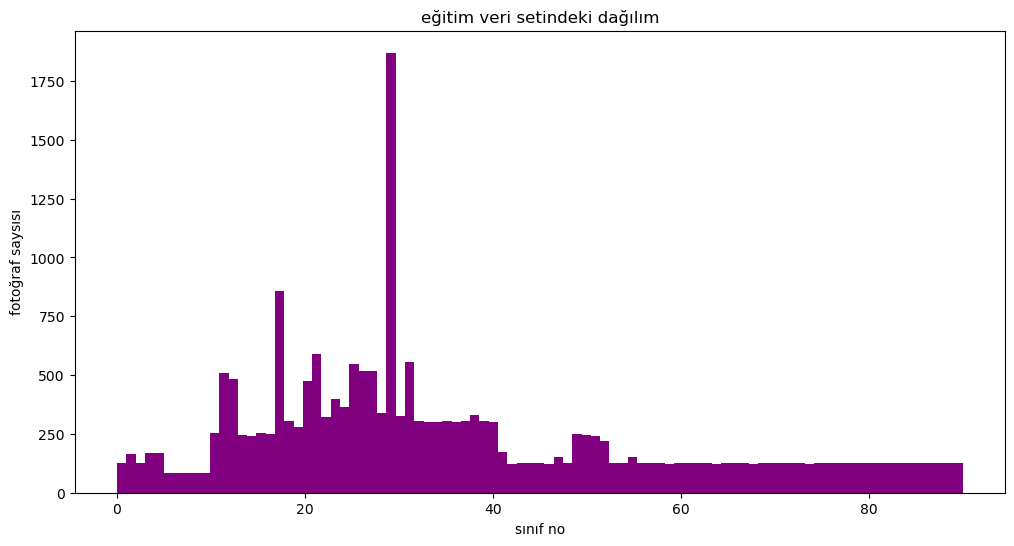

In [16]:
plt.figure(figsize=(12,6))
plt.hist(classNo, bins=len(data.Classid), color='purple')
plt.title("eğitim veri setindeki dağılım")
plt.xlabel("sınıf no")
plt.ylabel("fotoğraf saysısı")
plt.show()

In [17]:
X_train = X_train.astype(np.uint8)
X_validation = X_validation.astype(np.uint8)
X_test = X_test.astype(np.uint8)

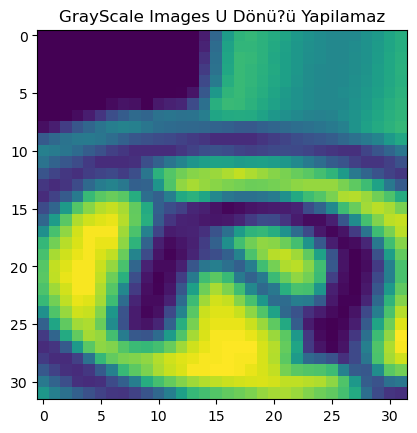

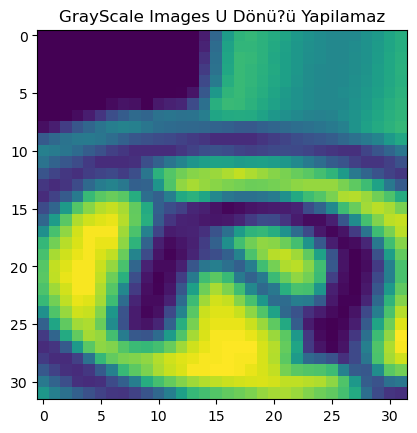

In [28]:
def equalize(img):
    img=cv2.equalizeHist(img)
    return img 

rand_num = random.randint(0,len(X_train)-1)
plt.imshow(X_train[rand_num])
plt.title("GrayScale Images {}".format(data.Name[y_train[rand_num]]))
plt.show()

 
X_train = np.array(list(map(equalize, X_train)))
X_validation = np.array(list(map(equalize, X_validation)))
X_test = np.array(list(map(equalize, X_test)))
plt.imshow(X_train[rand_num])
plt.title("GrayScale Images {}".format(data.Name[y_train[rand_num]]))
plt.show()

In [29]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2],1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1],X_validation.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],X_test.shape[2],1)

In [30]:
dataGen = ImageDataGenerator(width_shift_range=0.1, 
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)
dataGen.fit(X_train)
batches = dataGen.flow(X_train, y_train, batch_size=20)
X_batch, y_batch = next(batches)

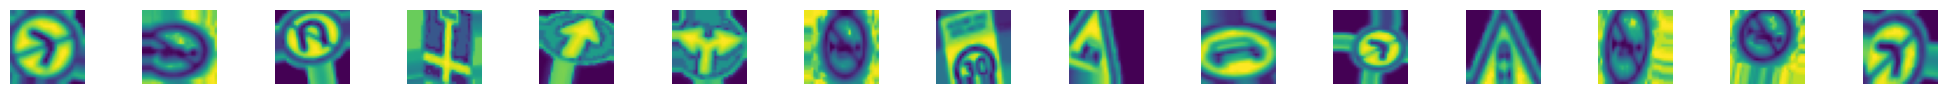

In [31]:
fig, axs = plt.subplots(1,15, figsize= (20,5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimensions[0], imageDimensions[1]))
    axs[i].axis('off')
plt.show()

In [32]:
def myModel(noOfClasses):
    no_Of_Filters = 64 
    size_of_Filter = (5,5)
    size_of_Filter2 = (3,3)
    size_of_pool= (3,3)
    no_Of_Nodes = 500
    noOfClasses = 91
    
    model = Sequential()
    model.add((Conv2D(no_Of_Filters, size_of_Filter, input_shape=(imageDimensions[0], imageDimensions[1],1), activation="relu")))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation="relu")))
    model.add(MaxPooling2D(pool_size = size_of_pool))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(no_Of_Nodes, activation="relu"))
    model.add(Dense(noOfClasses, activation="softmax"))
    model.compile('rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy']) 
    return model


In [33]:
batch_size_val = 64
noOfClasses = 92 
model = myModel(noOfClasses)
print(model.summary())

history = model.fit(dataGen.flow(X_train, y_train, batch_size=batch_size_val),
                    epochs=40, validation_data=(X_validation, y_validation))


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 500)            │     1,024,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 91)             │        45,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,090,347 (4.16 MB)

 Trainable params: 1,090,283 (4.16 MB)

 Non-trainable params: 64 (256.00 B)

None
Epoch 1/40
  1/213 ━━━━━━━━━━━━━━━━━━━━ 4:05 1s/step - accuracy: 0.0469 - loss: 4.9388

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


213/213 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.3581 - loss: 2.8371 - val_accuracy: 0.5771 - val_loss: 1.8133
Epoch 2/40
213/213 ━━━━━━━━━━━━━━━━━━━━ 33s 152ms/step - accuracy: 0.7398 - loss: 0.9146 - val_accuracy: 0.7656 - val_loss: 0.8869
Epoch 3/40
213/213 ━━━━━━━━━━━━━━━━━━━━ 38s 179ms/step - accuracy: 0.8379 - loss: 0.5671 - val_accuracy: 0.8056 - val_loss: 0.7337
Epoch 4/40
213/213 ━━━━━━━━━━━━━━━━━━━━ 37s 172ms/step - accuracy: 0.8737 - loss: 0.4259 - val_accuracy: 0.8912 - val_loss: 0.3736
Epoch 5/40
213/213 ━━━━━━━━━━━━━━━━━━━━ 35s 165ms/step - accuracy: 0.9085 - loss: 0.3229 - val_accuracy: 0.9426 - val_loss: 0.1885
Epoch 6/40
213/213 ━━━━━━━━━━━━━━━━━━━━ 35s 166ms/step - accuracy: 0.9259 - loss: 0.2494 - val_accuracy: 0.8612 - val_loss: 0.4915
Epoch 7/40
 18/213 ━━━━━━━━━━━━━━━━━━━━ 31s 162ms/step - accuracy: 0.9264 - loss: 0.2963

KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


model = myModel(noOfClasses)
model.load_weights('/Users/suedabeyzaozcan/Desktop/bittirmeproj/saved_model.weights.h5')

label_file = "/Users/suedabeyzaozcan/Desktop/bittirmeproj/labels.csv"
data = pd.read_csv(label_file, encoding="ISO-8859-1")

num_samples = 10
random_indices = random.sample(range(len(X_test)), num_samples)
sample_images = X_test[random_indices]
sample_labels = y_test[random_indices]

predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(20, 10))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].reshape(32, 32), cmap='gray')
    true_label = data.Name[sample_labels[i]]
    predicted_label = data.Name[predicted_classes[i]]
    plt.title(f"{predicted_label}", fontsize=20)  # Başlık yazı boyutu artırabilirsiniz
    plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['eğitim','doğrulama'])
plt.title('kayıp')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['eğitim','doğrulama'])
plt.title('Doğruluk')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Kaybı:',score[0])
print('Test Doğruluğu:',score[1])
score =model.evaluate(X_train,y_train,verbose=0)
print('eğitim Kaybı:',score[0])
print('eğitim Doğruluğu:',score[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


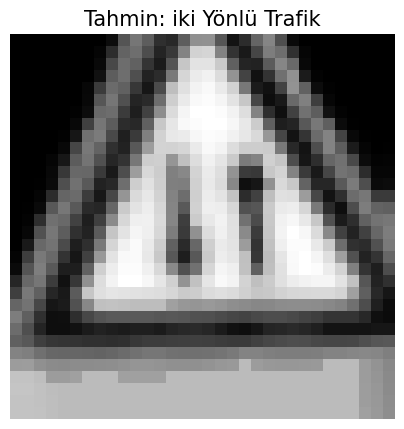

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Flatten, Conv2D, MaxPooling2D
import cv2
import os
import random

imageDimensions = (32, 32)
labelFile = "/Users/suedabeyzaozcan/Desktop/bittirmeproj/labels.csv"

def myModel(noOfClasses):
    no_Of_Filters = 64 
    size_of_Filter = (5, 5)
    size_of_Filter2 = (3, 3)
    size_of_pool = (3, 3)
    no_Of_Nodes = 500
    
    model = Sequential()
    model.add((Conv2D(no_Of_Filters, size_of_Filter, input_shape=(imageDimensions[0], imageDimensions[1], 1), activation="relu")))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation="relu")))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(no_Of_Nodes, activation="relu"))
    model.add(Dense(noOfClasses, activation="softmax"))

    model.compile('rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

noOfClasses = 91
model = myModel(noOfClasses)
model.load_weights('/Users/suedabeyzaozcan/Desktop/bittirmeproj/saved_model.weights.h5')
data = pd.read_csv(labelFile, encoding="ISO-8859-1")

# Test etmek istediğiniz görüntünün dosya yolu
image_path = "/Users/suedabeyzaozcan/Desktop/bittirmeproj/test/test/66/aug_0_40.png"

def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (32, 32))
    img = cv2.equalizeHist(img)
    img = img.reshape(1, 32, 32, 1)
    return img

sample_image_reshaped = load_and_preprocess_image(image_path)

prediction = model.predict(sample_image_reshaped)
predicted_class = np.argmax(prediction, axis=1)[0]

plt.figure(figsize=(5, 5))
plt.imshow(sample_image_reshaped.reshape(32, 32), cmap='gray')
predicted_label = data.Name[predicted_class]
plt.title(f"Tahmin: {predicted_label}", fontsize=15)
plt.axis("off")
plt.show()
